**Desarrollo de PCA**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [46]:
# Ruta de los archivos CSV
ruta_saber11 = r"C:\Users\jaime\ALUNA Dropbox\JAIME ARTURO RAMIREZ\MIAD-Proyecto\Saber11_PCA_ready.csv"
ruta_saberpro = r"C:\Users\jaime\ALUNA Dropbox\JAIME ARTURO RAMIREZ\MIAD-Proyecto\SaberPro_PCA_ready.csv"

# Leer los archivos CSV
df_saber11 = pd.read_csv(ruta_saber11)
df_saberpro = pd.read_csv(ruta_saberpro)

# Verificar las primeras filas de cada DataFrame
print("Primeras filas de Saber11:")
print(df_saber11.head())
print("\nPrimeras filas de SaberPro:")
print(df_saberpro.head())


Primeras filas de Saber11:
   FAMI_CUARTOSHOGAR  FAMI_PERSONASHOGAR  FAMI_ESTRATOVIVIENDA  \
0                2.0                 2.0                     2   
1                2.0                 2.0                     2   
2                2.0                 6.0                     1   
3                2.0                 6.0                     1   
4                4.0                 5.0                     5   

   FAMI_EDUCACIONMADRE  FAMI_EDUCACIONPADRE  CATEGORIA  EDAD_EXAMEN  \
0                    6                    1          6         16.0   
1                    6                    1          6         16.0   
2                    1                    1          6         17.0   
3                    1                    1          6         17.0   
4                    2                    3          0         16.0   

   PUNT_MATEMATICAS  PUNT_LECTURA_CRITICA  PUNT_GLOBAL  
0              66.0                  69.0        339.0  
1              66.0                

In [48]:
# Información general de los DataFrames
print("\nInformación de Saber11:")
df_saber11.info()
print("\nInformación de SaberPro:")
df_saberpro.info()



Información de Saber11:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4257229 entries, 0 to 4257228
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   FAMI_CUARTOSHOGAR     float64
 1   FAMI_PERSONASHOGAR    float64
 2   FAMI_ESTRATOVIVIENDA  int64  
 3   FAMI_EDUCACIONMADRE   int64  
 4   FAMI_EDUCACIONPADRE   int64  
 5   CATEGORIA             int64  
 6   EDAD_EXAMEN           float64
 7   PUNT_MATEMATICAS      float64
 8   PUNT_LECTURA_CRITICA  float64
 9   PUNT_GLOBAL           float64
dtypes: float64(6), int64(4)
memory usage: 324.8 MB

Información de SaberPro:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090585 entries, 0 to 1090584
Data columns (total 10 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   FAMI_ESTRATOVIVIENDA       1090585 non-null  int64  
 1   FAMI_EDUCACIONMADRE        1090585 non-null  int64  
 2   FAMI_EDUCACION

In [50]:
# Estandarizar datos de Saber11
scaler = StandardScaler()
saber11_scaled = scaler.fit_transform(df_saber11)

# Estandarizar datos de SaberPro
saberpro_scaled = scaler.fit_transform(df_saberpro)


In [52]:
# Aplicación de PCA

from sklearn.decomposition import PCA

# Aplicar PCA a Saber11 y a SaberPro, reteniendo suficientes componentes
pca_saber11 = PCA()
pca_saberpro = PCA()

# Ajuste de PCA en los datos escalados de Saber11 y SaberPro
pca_saber11.fit(saber11_scaled)
pca_saberpro.fit(saberpro_scaled)


PCA()

In [54]:
# Explicación de la varianza

# Explicación de la varianza para cada componente en Saber11
varianza_saber11 = pca_saber11.explained_variance_ratio_
print("Varianza explicada por cada componente en Saber11:")
print(varianza_saber11)

# Explicación de la varianza para cada componente en SaberPro
varianza_saberpro = pca_saberpro.explained_variance_ratio_
print("\nVarianza explicada por cada componente en SaberPro:")
print(varianza_saberpro)


Varianza explicada por cada componente en Saber11:
[0.36280102 0.14535577 0.13185369 0.09724411 0.07937349 0.060916
 0.04983951 0.04123078 0.02665193 0.0047337 ]

Varianza explicada por cada componente en SaberPro:
[0.35121573 0.14561062 0.11047261 0.08475273 0.07835895 0.05756265
 0.05289548 0.04831258 0.04184051 0.02897813]


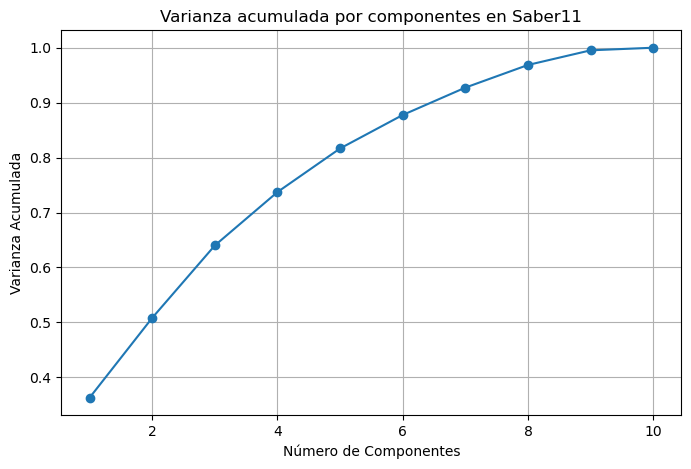

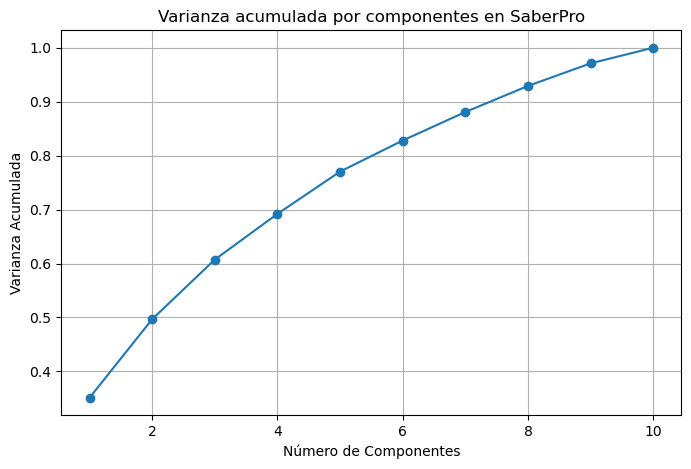

In [56]:
# Visualización de la varianza acumulada
# Un gráfico de la varianza acumulada ayuda a identificar el número de componentes necesarios
# para alcanzar un umbral de varianza, como el 90% o 95%.

import matplotlib.pyplot as plt

# Visualización de la varianza acumulada en Saber11
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_saber11) + 1), varianza_saber11.cumsum(), marker='o', linestyle='-')
plt.title("Varianza acumulada por componentes en Saber11")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Acumulada")
plt.grid(True)
plt.show()

# Visualización de la varianza acumulada en SaberPro
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_saberpro) + 1), varianza_saberpro.cumsum(), marker='o', linestyle='-')
plt.title("Varianza acumulada por componentes en SaberPro")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Acumulada")
plt.grid(True)
plt.show()



In [58]:
# Selección de número de componentes para retener la varianza óptima en Saber11 y SaberPro
# Saber11: Con 5 componentes se alcanza alredeedor del 82% de la varianza acumulada
# SaberPro: Con 6 componentes se alcanza el 82% de la varianza acumulada

pca_saber11_opt = PCA(n_components=5)
saber11_pca = pca_saber11_opt.fit_transform(saber11_scaled)

pca_saberpro_opt = PCA(n_components=6)
saberpro_pca = pca_saberpro_opt.fit_transform(saberpro_scaled)

# Mostrar el resultado transformado (opcionalmente se puede guardar en un DataFrame)
print("\nDatos de Saber11 transformados a componentes principales:")
print(saber11_pca)

print("\nDatos de SaberPro transformados a componentes principales:")
print(saberpro_pca)



Datos de Saber11 transformados a componentes principales:
[[ 2.54268261 -2.0783554  -0.82778231 -1.08544629  0.90489638]
 [ 2.54268261 -2.0783554  -0.82778231 -1.08544629  0.90489638]
 [-2.50067566 -0.46390378 -0.85889655 -0.78136373  0.02225856]
 ...
 [ 4.36766826  1.70936113  2.15003184  0.33793194  0.8313639 ]
 [-1.53969455  1.92953922  1.57742873  0.27750792 -0.25802673]
 [ 1.16822353  0.34813028  1.44536816  0.36218799  0.61889139]]

Datos de SaberPro transformados a componentes principales:
[[-1.97746606 -1.1864947   0.56733576 -0.01896336 -1.29088491 -0.12973935]
 [ 1.74851391 -1.60458857  2.64696595  0.6014827   0.78443825  0.49495814]
 [-0.71044039  0.23112482  2.87535194  0.6422119   0.38264303  0.52607669]
 ...
 [-4.07254277 -1.21579321  1.18362771 -2.8741946   1.34571554 -0.39937121]
 [-1.20587087 -0.20578739  0.54679984  0.00899229 -0.35449297 -1.22455871]
 [-4.10543307 -0.70643282  1.52811507 -0.15884644  0.58618473  0.22309145]]


In [60]:
# Crear un DataFrame para visualizar las cargas de las variables originales en los componentes principales
# Cargas para Saber11

# Definir las variables seleccionadas para cada conjunto de datos
variables_saber11 = ['FAMI_CUARTOSHOGAR', 'FAMI_PERSONASHOGAR', 'FAMI_ESTRATOVIVIENDA', 
                     'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'CATEGORIA', 'EDAD_EXAMEN', 
                     'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL']

variables_saberpro = ['FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 
                      'CATEGORIA', 'EDAD_EXAMEN', 'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_LECTURA_CRITICA_PUNT', 
                      'MOD_COMUNI_ESCRITA_PUNT', 'MOD_INGLES_PUNT', 'MOD_COMPETEN_CIUDADA_PUNT']

# Crear un DataFrame para visualizar las cargas de las variables originales en los componentes principales
# Número de componentes principales seleccionados
desired_components_saber11 = 5
desired_components_saberpro = 6

# Cargas para Saber11
loadings_saber11 = pd.DataFrame(pca_saber11_opt.components_.T, 
                                columns=[f'PC{i+1}' for i in range(desired_components_saber11)], 
                                index=variables_saber11)

print("\nCargas de las variables en los componentes principales (Saber11):")
print(loadings_saber11)

# Cargas para SaberPro
loadings_saberpro = pd.DataFrame(pca_saberpro_opt.components_.T, 
                                 columns=[f'PC{i+1}' for i in range(desired_components_saberpro)], 
                                 index=variables_saberpro)

print("\nCargas de las variables en los componentes principales (SaberPro):")
print(loadings_saberpro)




Cargas de las variables en los componentes principales (Saber11):
                           PC1       PC2       PC3       PC4       PC5
FAMI_CUARTOSHOGAR     0.033991  0.701025 -0.155918  0.055739  0.020899
FAMI_PERSONASHOGAR   -0.104036  0.617113 -0.337318  0.016664  0.055173
FAMI_ESTRATOVIVIENDA  0.292422  0.187811  0.390717  0.188248 -0.104319
FAMI_EDUCACIONMADRE   0.341471  0.131631  0.355206 -0.301153  0.243034
FAMI_EDUCACIONPADRE   0.313237  0.159606  0.383252 -0.300673  0.344349
CATEGORIA            -0.228230 -0.125555 -0.319160 -0.459596  0.627856
EDAD_EXAMEN          -0.186036 -0.019881  0.188833  0.720767  0.628795
PUNT_MATEMATICAS      0.435525 -0.101491 -0.329845  0.104862  0.081677
PUNT_LECTURA_CRITICA  0.436984 -0.107606 -0.302730  0.142638  0.069377
PUNT_GLOBAL           0.469526 -0.107810 -0.313416  0.134183  0.083209

Cargas de las variables en los componentes principales (SaberPro):
                                PC1       PC2       PC3       PC4       PC5  \
FAMI_

In [62]:
# Asegurarse de que saber11_scaled y saberpro_scaled están en formato de DataFrame con nombres de columnas
saber11_scaled_df = pd.DataFrame(saber11_scaled, columns=variables_saber11)
saberpro_scaled_df = pd.DataFrame(saberpro_scaled, columns=variables_saberpro)

# Definir las variables socioeconómicas
socioeconomic_vars_saber11 = ['FAMI_CUARTOSHOGAR', 'FAMI_PERSONASHOGAR', 'FAMI_ESTRATOVIVIENDA', 
                              'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'CATEGORIA', 'EDAD_EXAMEN']

socioeconomic_vars_saberpro = ['FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 
                               'CATEGORIA', 'EDAD_EXAMEN']

# Paso 2: Ejecutar PCA en las variables socioeconómicas
# PCA para Saber11
pca_socio_saber11 = PCA(n_components=5)  # Seleccionar número de componentes adecuados
saber11_socio_pca = pca_socio_saber11.fit_transform(saber11_scaled_df[socioeconomic_vars_saber11])

# PCA para SaberPro
pca_socio_saberpro = PCA(n_components=5)  # Seleccionar número de componentes adecuados
saberpro_socio_pca = pca_socio_saberpro.fit_transform(saberpro_scaled_df[socioeconomic_vars_saberpro])

# Mostrar los resultados transformados (opcionalmente, guardarlos en DataFrames)
print("\nComponentes principales de variables socioeconómicas en Saber11:")
print(saber11_socio_pca)

print("\nComponentes principales de variables socioeconómicas en SaberPro:")
print(saberpro_socio_pca)

# Obtener y mostrar las cargas (loadings) para analizar la contribución de cada variable original a los componentes
# Cargas para variables socioeconómicas en Saber11
loadings_saber11_socio = pd.DataFrame(pca_socio_saber11.components_.T, 
                                      columns=[f'PC{i+1}' for i in range(5)], 
                                      index=socioeconomic_vars_saber11)
print("\nCargas de las variables socioeconómicas en los componentes principales (Saber11):")
print(loadings_saber11_socio)

# Cargas para variables socioeconómicas en SaberPro
loadings_saberpro_socio = pd.DataFrame(pca_socio_saberpro.components_.T, 
                                       columns=[f'PC{i+1}' for i in range(5)], 
                                       index=socioeconomic_vars_saberpro)
print("\nCargas de las variables socioeconómicas en los componentes principales (SaberPro):")
print(loadings_saberpro_socio)



Componentes principales de variables socioeconómicas en Saber11:
[[ 0.60423137 -1.77125751 -1.48182261  0.79205036  0.83814936]
 [ 0.60423137 -1.77125751 -1.48182261  0.79205036  0.83814936]
 [-2.13061436 -0.11312967 -0.89868701  0.10087879  0.04651573]
 ...
 [ 4.55024628  0.79556019  0.97633822  0.93524369  0.79885985]
 [ 0.61548661  1.33499009  0.94338562  0.01261758 -0.62535478]
 [ 1.67705588 -0.16693442  0.84045902  0.7027051  -0.07122031]]

Componentes principales de variables socioeconómicas en SaberPro:
[[-1.82544175  0.59078974 -1.36105228 -0.03363233  0.03645695]
 [-0.65094507  2.79440611  0.45778743  0.19873673  0.44400647]
 [-0.39436544  2.91917187  0.57434287  0.16001047  0.81264803]
 ...
 [-3.36172454  1.15397117  1.31145087 -0.3439867   0.03754061]
 [-1.13540728  0.65477196 -0.29863328 -1.76904307  0.27705362]
 [-3.08357913  1.6372101   0.6629015  -0.1846874  -0.09781336]]

Cargas de las variables socioeconómicas en los componentes principales (Saber11):
                

**Conclusiones Análisis PCA**

La aplicación de PCA (Análisis de Componentes Principales) en los datos de variables socioeconómicas de las pruebas Saber11 y SaberPro arrojó información relevante sobre los factores que más contribuyen a la variabilidad de los puntajes en estas evaluaciones.

En el análisis de Saber11, los resultados indican que el primer componente principal está principalmente influido por las variables de educación de los padres y el estrato socioeconómico, mostrando una correlación positiva con el desempeño académico global del estudiante. Esto sugiere que el nivel educativo de los padres y el estrato económico representan variables significativas que podrían estar relacionadas con un mejor desempeño en el contexto académico.

Para SaberPro, los primeros componentes también están dominados por las mismas variables: el estrato socioeconómico y los niveles educativos de los padres. Sin embargo, existen diferencias en los patrones de carga para otras variables en componentes secundarios, que podrían indicar variaciones en cómo estos factores afectan el desempeño en etapas educativas más avanzadas. Además, las variables FAMI_CUARTOSHOGAR y FAMI_PERSONASHOGAR mostraron influencia en el segundo componente en Saber11, lo que sugiere que el tamaño del hogar y el número de habitaciones pueden influir en el desempeño, aunque en menor medida.

Estos resultados establecen que los factores socioeconómicos y educativos familiares tienen una relación directa con el rendimiento académico en ambos niveles, lo que permite validar su uso como predictores potenciales en un modelo de predicción de puntaje.

In [68]:
# Guardar componentes principales de Saber11 con las variables de perfil
saber11_pca_df = pd.DataFrame(saber11_socio_pca, columns=[f'PC{i+1}' for i in range(saber11_socio_pca.shape[1])])
saber11_pca_df['FAMI_ESTRATOVIVIENDA'] = df_saber11['FAMI_ESTRATOVIVIENDA']
saber11_pca_df['FAMI_EDUCACIONMADRE'] = df_saber11['FAMI_EDUCACIONMADRE']
saber11_pca_df['FAMI_EDUCACIONPADRE'] = df_saber11['FAMI_EDUCACIONPADRE']
saber11_pca_df.to_csv(r"C:\Users\jaime\ALUNA Dropbox\JAIME ARTURO RAMIREZ\MIAD-Proyecto\Saber11_PCA_components.csv", index=False)

# Guardar componentes principales de SaberPro con las variables de perfil
saberpro_pca_df = pd.DataFrame(saberpro_socio_pca, columns=[f'PC{i+1}' for i in range(saberpro_socio_pca.shape[1])])
saberpro_pca_df['FAMI_ESTRATOVIVIENDA'] = df_saberpro['FAMI_ESTRATOVIVIENDA']
saberpro_pca_df['FAMI_EDUCACIONMADRE'] = df_saberpro['FAMI_EDUCACIONMADRE']
saberpro_pca_df['FAMI_EDUCACIONPADRE'] = df_saberpro['FAMI_EDUCACIONPADRE']
saberpro_pca_df.to_csv(r"C:\Users\jaime\ALUNA Dropbox\JAIME ARTURO RAMIREZ\MIAD-Proyecto\SaberPro_PCA_components.csv", index=False)


In [74]:
print("Valores únicos en Saber11:")
for col in ['FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE']:
    print(f"{col}: {df_saber11[col].unique()}")

print("\nValores únicos en SaberPro:")
for col in ['FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE']:
    print(f"{col}: {df_saberpro[col].unique()}")

Valores únicos en Saber11:
FAMI_ESTRATOVIVIENDA: [2 1 5 3 4 0 6]
FAMI_EDUCACIONMADRE: [6 1 2 4 3 5 0]
FAMI_EDUCACIONPADRE: [1 3 4 2 0 6 5]

Valores únicos en SaberPro:
FAMI_ESTRATOVIVIENDA: [1 2 3 4 5 6 0]
FAMI_EDUCACIONMADRE: [1 5 6 7 3 4 2 0]
FAMI_EDUCACIONPADRE: [0 3 1 5 6 2 4 7]


Parece que en SaberPro, los valores de FAMI_EDUCACIONMADRE y FAMI_EDUCACIONPADRE incluyen un valor "7" que no está presente en Saber11. Esto sugiere que, en SaberPro, se categorizó un nivel educativo adicional, probablemente "posgrado" o un nivel de educación superior que no aparece en Saber11. Es posible que, en algún momento, esta diferencia se deba a un ajuste en la categorización de niveles educativos o una diferenciación entre ambos exámenes.

Para abordar esto, se va a hacer lo siguiente:

Agrupar valores: Dado que "6" en Saber11 representa educación profesional y "7" en SaberPro podría representar posgrado o un nivel más alto, se puede agrupar "6" y "7" en una misma categoría en SaberPro (ambas a "6"). Esto facilita la alineación sin eliminar distinción en niveles educativos más bajos.

Reasignar valores de SaberPro: Convertir todos los "7" de FAMI_EDUCACIONMADRE y FAMI_EDUCACIONPADRE en SaberPro a "6" para asegurar compatibilidad total con Saber11.

In [81]:
# Convertir valores de educación en ambas tablas
df_saber11['FAMI_EDUCACIONMADRE'] = df_saber11['FAMI_EDUCACIONMADRE'].replace({7: 6})
df_saber11['FAMI_EDUCACIONPADRE'] = df_saber11['FAMI_EDUCACIONPADRE'].replace({7: 6})

df_saberpro['FAMI_EDUCACIONMADRE'] = df_saberpro['FAMI_EDUCACIONMADRE'].replace({7: 6})
df_saberpro['FAMI_EDUCACIONPADRE'] = df_saberpro['FAMI_EDUCACIONPADRE'].replace({7: 6})

In [85]:
# Verificar valores únicos después de la modificación
print("Valores únicos actualizados en SaberPro:")
print("FAMI_EDUCACIONMADRE:", df_saberpro['FAMI_EDUCACIONMADRE'].unique())
print("FAMI_EDUCACIONPADRE:", df_saberpro['FAMI_EDUCACIONPADRE'].unique())

Valores únicos actualizados en SaberPro:
FAMI_EDUCACIONMADRE: [1 5 6 3 4 2 0]
FAMI_EDUCACIONPADRE: [0 3 1 5 6 2 4]


In [87]:
# Define la ruta donde se guardará el archivo actualizado de Saber11 y SaberPro
ruta_salida = r"C:\Users\jaime\ALUNA Dropbox\JAIME ARTURO RAMIREZ\MIAD-Proyecto"

# Exportar Saber11 actualizado a un archivo CSV
df_saber11.to_csv(rf"{ruta_salida}\Saber11_actualizado.csv", index=False)

print("Archivo 'Saber11_actualizado.csv' generado con éxito en la ruta especificada.")

# Exportar SaberPro actualizado a un archivo CSV
df_saberpro.to_csv(rf"{ruta_salida}\SaberPro_actualizado.csv", index=False)

print("Archivo 'SaberPro_actualizado.csv' generado con éxito en la ruta especificada.")


Archivo 'Saber11_actualizado.csv' generado con éxito en la ruta especificada.
Archivo 'SaberPro_actualizado.csv' generado con éxito en la ruta especificada.
